In [1]:
import numpy as np
import keras
from keras.datasets import cifar10


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:

X_train.shape


(50000, 32, 32, 3)

In [4]:
# normalize the pixel values
X_train = np.array(X_train, dtype='float') / 255.0
X_test = np.array(X_test, dtype='float') / 255.0

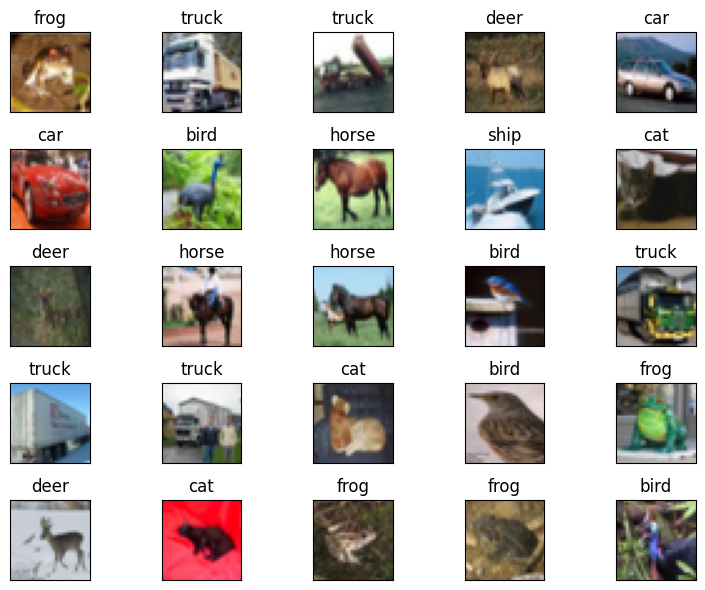

In [5]:
# visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8,6))

num=0
for i in range(5):
    for j in range(5):
        img = X_train[num]
        ax[i][j].imshow(img)
        ax[i][j].set_title(classes[y_train[num][0]])
        num += 1

ax[0][0].set_yticks([])
ax[0][0].set_xticks([])
plt.tight_layout()
plt.show()

In [6]:

y_train[0]

array([6], dtype=uint8)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [9]:
from keras.models import Sequential

model = Sequential()


In [10]:
input_shape = X_train[0].shape

In [11]:
from keras.layers import Dense, Conv2D

from keras import layers
model.add(keras.Input(shape=input_shape))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(y_train_ohe.shape[1], activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 32)          0

In [12]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=False)

# Compile the model with categorical crossentropy loss and SGD optimizer
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
H = model.fit(X_train, y_train_ohe, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 27s 18ms/step - loss: 2.1676 - accuracy: 0.1922 - val_loss: 1.9818 - val_accuracy: 0.2772
Epoch 2/50
1407/1407 [==============================] - 26s 19ms/step - loss: 1.8746 - accuracy: 0.3140 - val_loss: 1.7865 - val_accuracy: 0.3398
Epoch 3/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6743 - accuracy: 0.3926 - val_loss: 1.5921 - val_accuracy: 0.4148
Epoch 4/50
1407/1407 [==============================] - 26s 19ms/step - loss: 1.5586 - accuracy: 0.4353 - val_loss: 1.5082 - val_accuracy: 0.4460
Epoch 5/50
1407/1407 [==============================] - 26s 18ms/step - loss: 1.4805 - accuracy: 0.4633 - val_loss: 1.4418 - val_accuracy: 0.4770
Epoch 6/50
1407/1407 [==============================] - 26s 19ms/step - loss: 1.4271 - accuracy: 0.4844 - val_loss: 1.3844 - val_accuracy: 0.5022
Epoch 7/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.3801 - accuracy: 0.5032 - val_loss: 1.3629 -

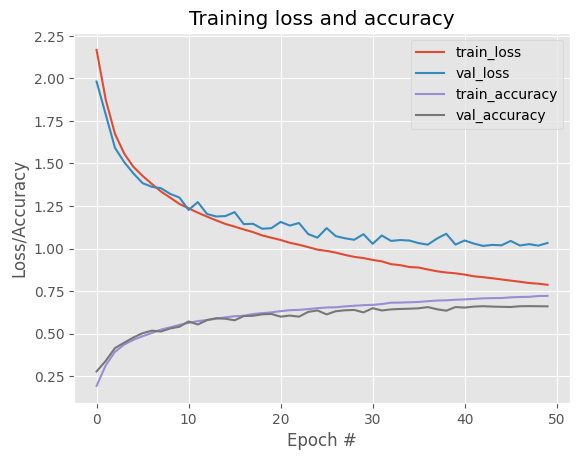

In [14]:
'''LEARNING CURVE'''

import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()



In [15]:
score = model.evaluate(X_test, y_test_ohe, batch_size=32)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])


313/313 [==============================] - 2s 6ms/step - loss: 1.0708 - accuracy: 0.6404
Test Loss =  1.0708484649658203
Test Accuracy =  0.6403999924659729


In [16]:
'''CONFUSION MATRIX'''
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
print(confusion_matrix(y_test_ohe.argmax(axis=1), predictions.argmax(axis=1)))


313/313 [==============================] - 3s 8ms/step
[[641  28  44  22  60   9  11  15 133  37]
 [ 34 709   7  10  12   5  15  14  64 130]
 [ 62  10 450  71 202  65  65  34  25  16]
 [ 13  12  61 409 148 172  96  45  18  26]
 [ 19   1  41  40 737  23  45  68  16  10]
 [  6   3  53 149 118 541  34  60  20  16]
 [  4   6  35  51 118  15 732  11  11  17]
 [ 11   7  27  47 145  68   6 647   5  37]
 [ 56  18   8  14  23   4   5   5 828  39]
 [ 34  94  12  21  23   9  13  19  65 710]]


In [17]:
'''CLASSIFICATION REPORT'''
from sklearn.metrics import classification_report
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test_ohe.argmax(axis=1), predictions.argmax(axis=1), target_names=classes))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

       plane       0.73      0.64      0.68      1000
         car       0.80      0.71      0.75      1000
        bird       0.61      0.45      0.52      1000
         cat       0.49      0.41      0.45      1000
        deer       0.46      0.74      0.57      1000
         dog       0.59      0.54      0.57      1000
        frog       0.72      0.73      0.72      1000
       horse       0.70      0.65      0.67      1000
        ship       0.70      0.83      0.76      1000
       truck       0.68      0.71      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

